Import dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and processing

In [3]:
dataframe=pd.read_csv("D:\\Downloads\\archive\\car data.csv")

In [4]:
dataframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#checking the number of rows and columns
dataframe.shape

(301, 9)

In [7]:
#Getting some information about the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#checking the number of missing values
dataframe.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#checking the distribution of categorical data
print(dataframe.Fuel_Type.value_counts())
print(dataframe.Seller_Type.value_counts())
print(dataframe.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [26]:
pd.set_option('future.no_silent_downcasting', True)
#Encoding "Fuel_Type" column
dataframe.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
#Encoding "Seller_Type" column
dataframe.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
#Encoding "Transmission" column
dataframe.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [27]:
dataframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Data and Target

In [28]:
x = dataframe.drop(columns=["Car_Name","Selling_Price"],axis=1)
y = dataframe["Selling_Price"]

In [29]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type Transmission  \
0    2014           5.59       27000          0            0            0   
1    2013           9.54       43000          1            0            0   
2    2017           9.85        6900          0            0            0   
3    2011           4.15        5200          0            0            0   
4    2014           6.87       42450          1            0            0   
..    ...            ...         ...        ...          ...          ...   
296  2016          11.60       33988          1            0            0   
297  2015           5.90       60000          0            0            0   
298  2009          11.00       87934          0            0            0   
299  2017          12.50        9000          1            0            0   
300  2016           5.90        5464          0            0            0   

     Owner  
0        0  
1        0  
2        0  
3        0  
4        0

Splitting the data into training and testing data

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [98]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training

1.Linear regression

In [99]:
lin_reg=LinearRegression()

In [100]:
lin_reg.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [101]:
#prediction on training data
training_data_prediction = lin_reg.predict(x_train)

In [102]:
# R sqaured Error
error_score = metrics.r2_score(training_data_prediction,y_train)
print("R sqaured Error:",error_score)

R sqaured Error: 0.8635655509199313


visualize the actual prices and predicted prices

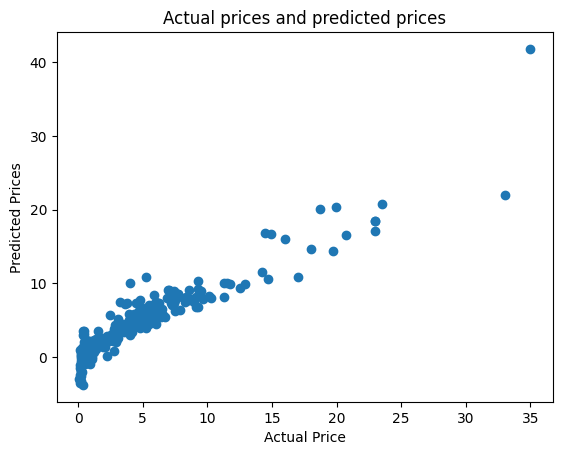

In [103]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and predicted prices")
plt.show()

In [104]:
#prediction on test data
test_data_prediction = lin_reg.predict(x_test)

In [105]:
# R sqaured Error
error_score = metrics.r2_score(test_data_prediction,y_test)
print("R sqaured Error:",error_score)

R sqaured Error: 0.806219994117533


visualize the actual prices and predicted prices

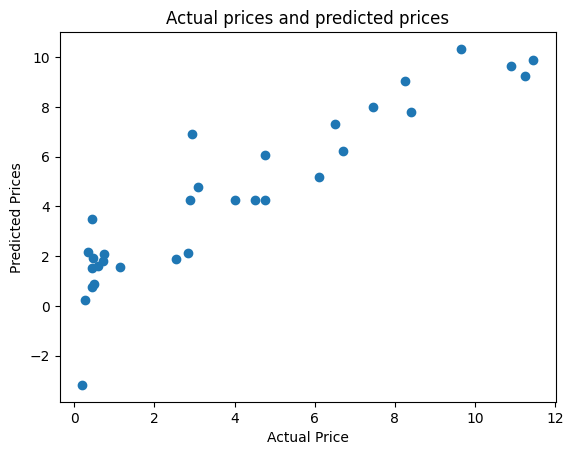

In [106]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and predicted prices")
plt.show()

2.Lasso Regression

In [107]:
lass_reg=Lasso()

In [108]:
lass_reg.fit(x_train,y_train)

Lasso()

In [109]:
#prediction on training data
training_data_prediction = lass_reg.predict(x_train)

In [110]:
# R sqaured Error
error_score = metrics.r2_score(training_data_prediction,y_train)
print("R sqaured Error:",error_score)

R sqaured Error: 0.798459024070425


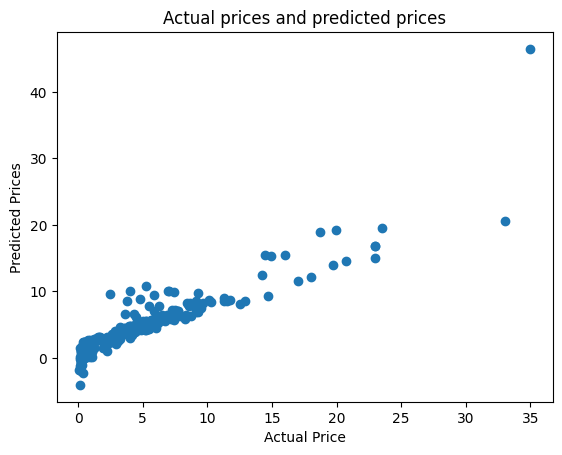

In [111]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and predicted prices")
plt.show()

In [112]:
#prediction on test data
test_data_prediction = lin_reg.predict(x_test)

In [113]:
# R sqaured Error
error_score = metrics.r2_score(test_data_prediction,y_test)
print("R sqaured Error:",error_score)

R sqaured Error: 0.806219994117533


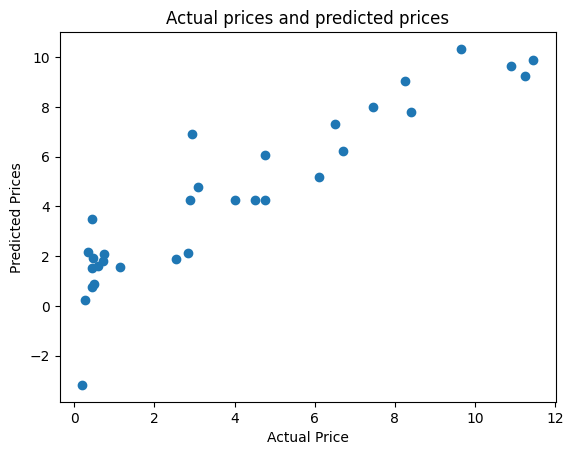

In [114]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and predicted prices")
plt.show()